# This is the creation of the plant watering ML model

In [ ]:
%tensorflow_version 2.x

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

from google.colab import drive
from google.colab import files

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [ ]:
# Loading dataset from gdrive
drive.mount('/content/gdrive')
dataset_path = '/content/gdrive/MyDrive/Colab Notebooks/SIoT/ml_training_dataset.csv'

Mounted at /content/gdrive


In [ ]:
train_df = pd.read_csv(dataset_path)
train_df = train_df.drop(columns=['Unnamed: 0'])

In [ ]:
normalized_df = train_df
normalized_df['labels'] = normalized_df['labels']/100

In [ ]:
shuffled_df = normalized_df.reindex(np.random.permutation(normalized_df.index))

In [ ]:
# Feature columns

feature_columns = []

wind = tf.feature_column.numeric_column('wind')
feature_columns.append(wind)

humidity = tf.feature_column.numeric_column('humidity')
feature_columns.append(humidity)

local_soil_temperature = tf.feature_column.numeric_column('local_soil_temperature')
feature_columns.append(local_soil_temperature)

temp = tf.feature_column.numeric_column('temp')
feature_columns.append(temp)

cloud = tf.feature_column.numeric_column('cloud')
feature_columns.append(cloud)

rain_24h = tf.feature_column.numeric_column('rain_24h')
feature_columns.append(rain_24h)

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [ ]:
#@title Define the plotting function.

def plot_the_loss_curve(epochs, mse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [ ]:
# Building the model

def create_model(learning_rate, feature_layer, l2_reg, dropout):
  """Create and compile a simple linear regression model."""

  model = tf.keras.models.Sequential()

  model.add(feature_layer)
  
  model.add(tf.keras.layers.Dense(units=14, 
                                  activation='relu', 
                                  name='Hidden1',
                                  kernel_regularizer=tf.keras.regularizers.l2(l=l2_reg)))

  model.add(tf.keras.layers.Dropout(rate=dropout))
  
  model.add(tf.keras.layers.Dense(units=7, 
                                  activation='relu', 
                                  name='Hidden5',
                                  kernel_regularizer=tf.keras.regularizers.l2(l=l2_reg)))

  
  model.add(tf.keras.layers.Dense(units=1,  
                                  name='Output'))                              
  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

  return model

In [ ]:
# Training the model

def train_model(model, dataset, epochs, label_name,
                batch_size=None):

  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True) 

  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  mse = hist["mean_squared_error"]

  return epochs, mse

Epoch 1/100
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
2/2 [==============================] - 0s 6ms/step - loss: 0.2301 - mean_squared_error: 0.2301
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1354 - mean_squared_error: 0.1354
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0910 - mean_squared_error: 0.0910
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0724 - mean_squared_error: 0.0724
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2904 - mean_squared_error: 0.2904
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 0.1030 - mean_squared_error: 0.1030
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0730 - mean_squared_error: 0.0730
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0749 - mean_squared_error: 0.0749
Epoch 9/100
2/2 [=================

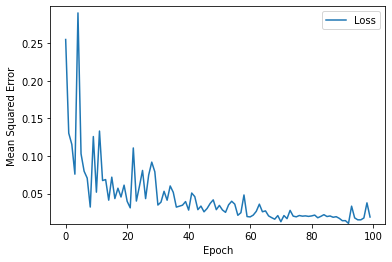

In [ ]:
# Testing the net

# Hyperparameters
learning_rate = 0.005
epochs = 100
batch_size = 40
l2_reg = 0.0
dropout_rate = 0.1


label_name = 'labels'

model = create_model(learning_rate, feature_layer, l2_reg, dropout_rate)

epochs, mse = train_model(model, shuffled_df, epochs, 
                          label_name, batch_size)
plot_the_loss_curve(epochs, mse)

In [ ]:
x = [[normalized_df['wind']], [normalized_df['humidity']], [normalized_df['temp']], [normalized_df['cloud']], [normalized_df['rain_24h']], [normalized_df['local_soil_temperature']],]

features = {name:np.array(value) for name, value in normalized_df.items()}
label = np.array(features.pop(label_name))

pred_soil_temps = model.predict(features)

Consider rewriting this model with the Functional API.


In [ ]:
normalized_df['pred_labels'] = pred_soil_temps

<BarContainer object of 75 artists>

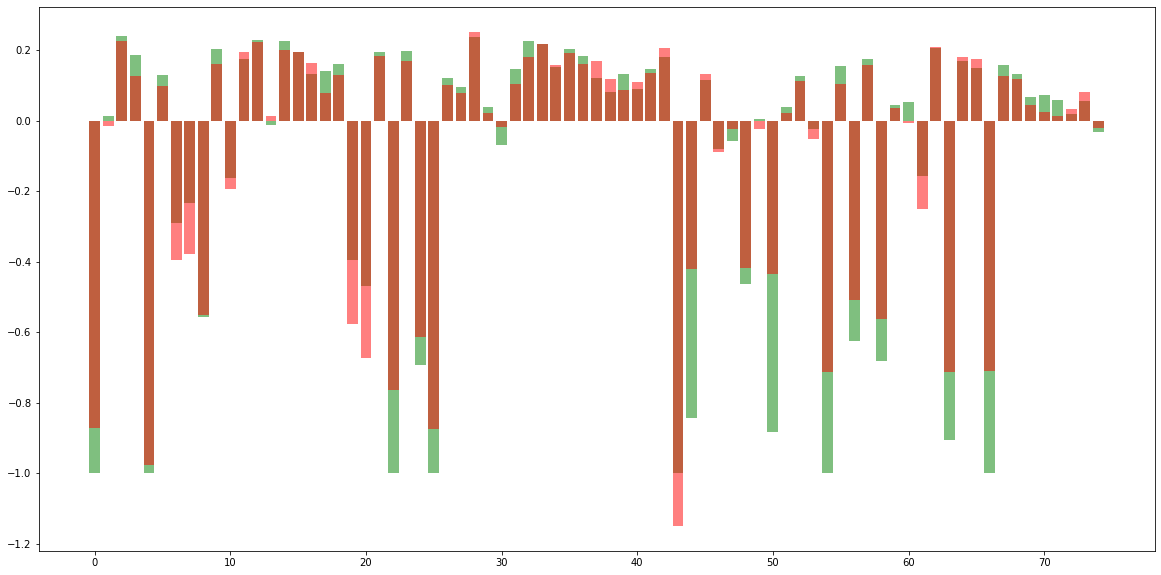

In [ ]:

x_pos = [i for i, _ in enumerate(normalized_df['labels'])]
plt.figure(figsize=(20,10))
plt.bar(x_pos, normalized_df['labels'], color='green', alpha = 0.5)
plt.bar(x_pos, normalized_df['pred_labels'], color='red', alpha = 0.5)


In [ ]:
# model.save('/content/gdrive/MyDrive/Colab Notebooks/SIoT/watering_model.model')

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/SIoT/watering_model.model/assets


In [ ]:
columns = ['wind', 'humidity', 'local_soil_temperature', 'temp', 'cloud', 'rain_24h']
rows = [[0.5, -1.6, 1.3, 1.4, 0.4, 12.6]]

sd_df = pd.DataFrame(data=rows, columns=columns)

In [ ]:
normalized_df.head()

,wind,humidity,local_soil_temperature,temp,cloud,rain_24h,labels,pred_labels
0,0.5,-1.6,1.3,1.4,0.4,12.6,-1.0,-0.9
1,-0.1,0.5,1.5,1.6,0.2,1.9,0.0,-0.0
2,0.5,-0.3,1.2,1.3,-0.0,0.1,0.2,0.2
3,-0.2,0.0,1.0,1.0,-0.2,0.3,0.2,0.1
4,0.4,-0.5,0.8,0.8,0.3,20.5,-1.0,-1.0


In [ ]:
features = {name:np.array(value) for name, value in sd_df.items()}
day_pred = model.predict(features)

In [ ]:
day_pred

array([[-0.8779611]], dtype=float32)

## The short answer to saving & loading

If you only have 10 seconds to read this guide, here's what you need to know.

**Saving a Keras model:**

```python
model = ...  # Get model (Sequential, Functional Model, or Model subclass)
model.save('path/to/location')
```

**Loading the model back:**

```python
from tensorflow import keras
model = keras.models.load_model('path/to/location')
```

Now, let's look at the details.